In [18]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from tree.base import DecisionTree
from metrics import *
from sklearn.model_selection import train_test_split

np.random.seed(42)
num_average_time = 100  # Number of times to run each experiment to calculate the average values

In [19]:




# Set random seed and average run count
np.random.seed(42)
NUM_AVERAGE_RUNS = 100

# Generate synthetic dataset
def generate_data(N, M, input_type, output_type):
    if input_type == "real":
        X = pd.DataFrame(np.random.randn(N, M))
    elif input_type == "discrete":
        X = pd.DataFrame({i: pd.Series(np.random.randint(2, size=N), dtype="category") for i in range(M)})

    if output_type == "real":
        y = pd.Series(np.random.randn(N))
    elif output_type == "discrete":
        y = pd.Series(np.random.randint(M, size=N), dtype="category")

    return X, y

# Evaluate average training and prediction times
def evaluate_runtime(N, M, input_type, output_type, test_size, criterias):
    X, y = generate_data(N, M, input_type, output_type)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size)

    time_data = {}
    for criteria in criterias:
        fit_times, predict_times = [], []

        for _ in range(NUM_AVERAGE_RUNS):
            tree = DecisionTree(criterion=criteria, max_depth=5)

            start_train = time.time()
            tree.fit(X_train, y_train)
            fit_times.append(time.time() - start_train)

            start_test = time.time()
            tree.predict(X_test)
            predict_times.append(time.time() - start_test)

        time_data[criteria] = {
            "train_time": np.mean(fit_times),
            "test_time": np.mean(predict_times),
            "std_train_time": np.std(fit_times),
            "std_test_time": np.std(predict_times)
        }

        print(f"    Criteria: {criteria}")
        print(f"        Avg Train Time: {time_data[criteria]['train_time']:.4f}s (std: {time_data[criteria]['std_train_time']:.4f})")
        print(f"        Avg Predict Time: {time_data[criteria]['test_time']:.4f}s (std: {time_data[criteria]['std_test_time']:.4f})")

    return time_data

# Run experiments for different combinations of N and M
def run_n_m(N_values, M_values, input_types, output_types, test_size, criterias):
    results = {}
    for N in N_values:
        for M in M_values:
            print(f"\nEvaluating for N={N}, M={M}")
            results[(N, M)] = {}
            for input_type in input_types:
                for output_type in output_types:
                    print(f"    Input: {input_type}, Output: {output_type}")
                    results[(N, M)][(input_type, output_type)] = evaluate_runtime(N, M, input_type, output_type, test_size, criterias)
            print("=" * 50)
    return results

N_values = [50, 200]
M_values = [1, 10]
criterias = ["entropy"]  # fine; regression side will just ignore it
input_types = ["real", "discrete"]
output_types = ["real", "discrete"]
test_size = 0.3

results = run_n_m(N_values, M_values, input_types, output_types, test_size, criterias)



Evaluating for N=50, M=1
    Input: real, Output: real
    Criteria: entropy
        Avg Train Time: 0.1224s (std: 0.0041)
        Avg Predict Time: 0.0003s (std: 0.0002)
    Input: real, Output: discrete
    Criteria: entropy
        Avg Train Time: 0.0001s (std: 0.0001)
        Avg Predict Time: 0.0001s (std: 0.0000)
    Input: discrete, Output: real
    Criteria: entropy
        Avg Train Time: 0.0020s (std: 0.0001)
        Avg Predict Time: 0.0002s (std: 0.0000)
    Input: discrete, Output: discrete
    Criteria: entropy
        Avg Train Time: 0.0001s (std: 0.0000)
        Avg Predict Time: 0.0002s (std: 0.0000)

Evaluating for N=50, M=10
    Input: real, Output: real
    Criteria: entropy
        Avg Train Time: 0.5140s (std: 0.0292)
        Avg Predict Time: 0.0002s (std: 0.0000)
    Input: real, Output: discrete
    Criteria: entropy
        Avg Train Time: 0.7032s (std: 0.0152)
        Avg Predict Time: 0.0003s (std: 0.0000)
    Input: discrete, Output: real
    Criteria: ent

Plotting: Time vs Number of Features (M)


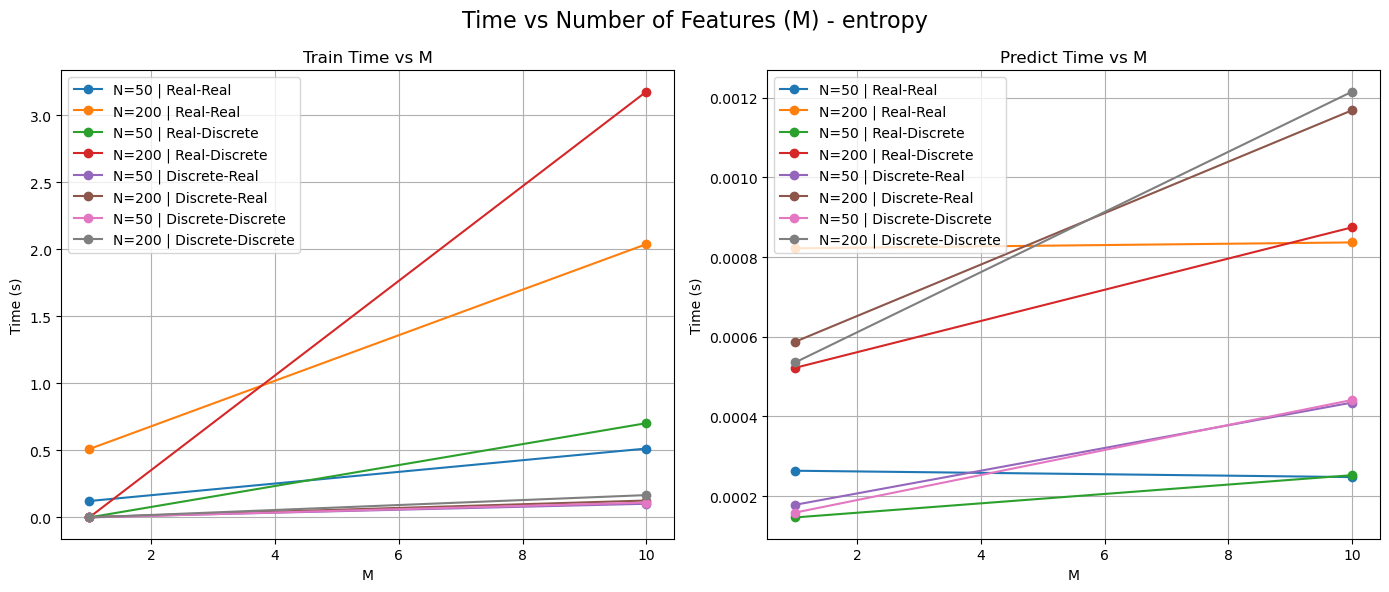

In [20]:
# -------- Time vs M (all N curves on the same axes) --------
criteria="entropy"
print("Plotting: Time vs Number of Features (M)")
plt.figure(figsize=(14, 6))
plt.suptitle(f"Time vs Number of Features (M) - {criteria}", fontsize=16)

# One figure with two subplots: Train (left) and Predict (right)
ax_train = plt.subplot(1, 2, 1)
ax_test  = plt.subplot(1, 2, 2)

for input_type in input_types:
    for output_type in output_types:
        # For each N, build the y-arrays over all M and plot as one line (just like your example)
        for N in N_values:
            train_times, test_times = [], []
            missing = False

            for M in M_values:
                nm_key = (N, M)
                io_key = (input_type, output_type)
                try:
                    data = results[nm_key][io_key][criteria]
                except KeyError:
                    # Skip this line if any point is missing
                    missing = True
                    break

                train_times.append(data["train_time"])
                test_times.append(data["test_time"])

            if missing:
                continue

            lbl = f"N={N} | {input_type.capitalize()}-{output_type.capitalize()}"
            ax_train.plot(M_values, train_times, marker='o', label=lbl)
            ax_test.plot(M_values,  test_times,  marker='o', label=lbl)

# cosmetics
ax_train.set_title("Train Time vs M"); ax_train.set_xlabel("M"); ax_train.set_ylabel("Time (s)")
ax_test.set_title("Predict Time vs M"); ax_test.set_xlabel("M"); ax_test.set_ylabel("Time (s)")
ax_train.grid(True); ax_test.grid(True)
ax_train.legend();  ax_test.legend()

plt.tight_layout()
plt.show()
